# Regression Assumptions Analysis

**Date:** 28 September 2025

**Topic:** Validation of linear regression assumptions

This notebook covers:
1. Linearity Assessment
2. Homoscedasticity Testing
3. Normality of Residuals
4. Independence of Errors
5. Real-world Dataset Applications

## 1. Setup and Dependencies

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

## 2. Synthetic Dataset Analysis

### 2.1 Dataset Generation and Model Fitting

In [2]:
# Generate synthetic dataset with controlled properties
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Feature dimensions: {X_train.shape[1]} feature(s)")

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print(f"\nModel Performance:")
print(f"Training R²: {model.score(X_train, y_train):.4f}")
print(f"Testing R²: {model.score(X_test, y_test):.4f}")

Training set size: 140 samples
Testing set size: 60 samples
Feature dimensions: 1 feature(s)

Model Performance:
Training R²: 0.9354
Testing R²: 0.9490


### 2.2 Linearity Assessment

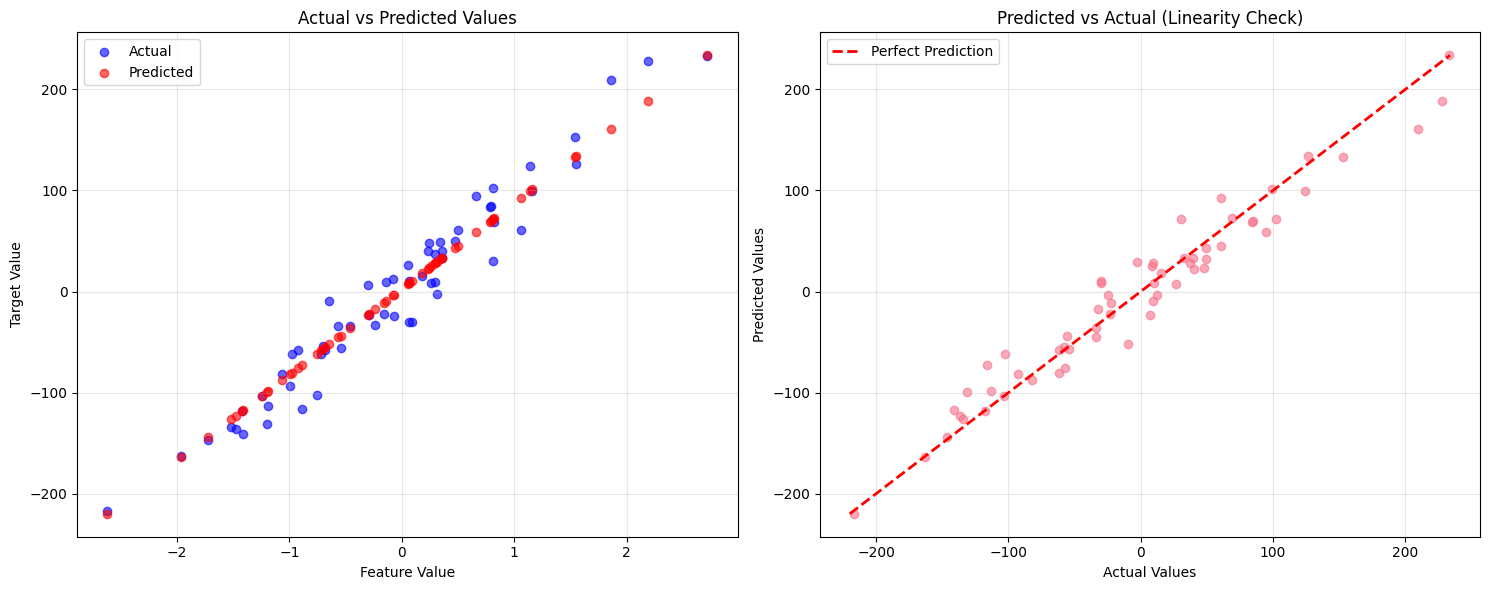

In [3]:
# Create regression plot to assess linearity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Actual vs Predicted
ax1.scatter(X_test.flatten(), y_test, label="Actual", alpha=0.6, color="blue")
ax1.scatter(X_test.flatten(), y_pred, label="Predicted", alpha=0.6, color="red")
ax1.set_xlabel('Feature Value')
ax1.set_ylabel('Target Value')
ax1.set_title('Actual vs Predicted Values')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Perfect prediction line
ax2.scatter(y_test, y_pred, alpha=0.6)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Predicted vs Actual (Linearity Check)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Residual Analysis

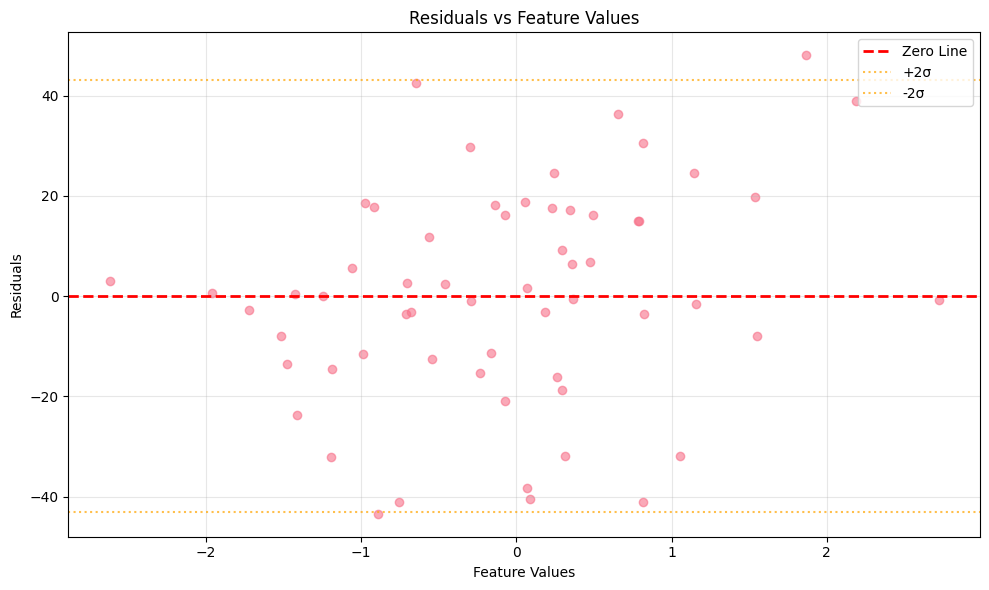

Residual Statistics:
Mean: 0.3724
Standard Deviation: 21.5610
Min: -43.3926
Max: 48.0475


In [4]:
# Calculate residuals
residuals = y_test - y_pred

# Basic residual plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test.flatten(), residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Zero Line')
plt.xlabel('Feature Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Feature Values')
plt.legend()
plt.grid(True, alpha=0.3)

# Add horizontal lines for pattern detection
std_resid = np.std(residuals)
plt.axhline(y=2*std_resid, color='orange', linestyle=':', alpha=0.7, label='+2σ')
plt.axhline(y=-2*std_resid, color='orange', linestyle=':', alpha=0.7, label='-2σ')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Residual Statistics:")
print(f"Mean: {np.mean(residuals):.4f}")
print(f"Standard Deviation: {np.std(residuals):.4f}")
print(f"Min: {np.min(residuals):.4f}")
print(f"Max: {np.max(residuals):.4f}")

## 3. Homoscedasticity Testing

### 3.1 Residuals vs Fitted Values

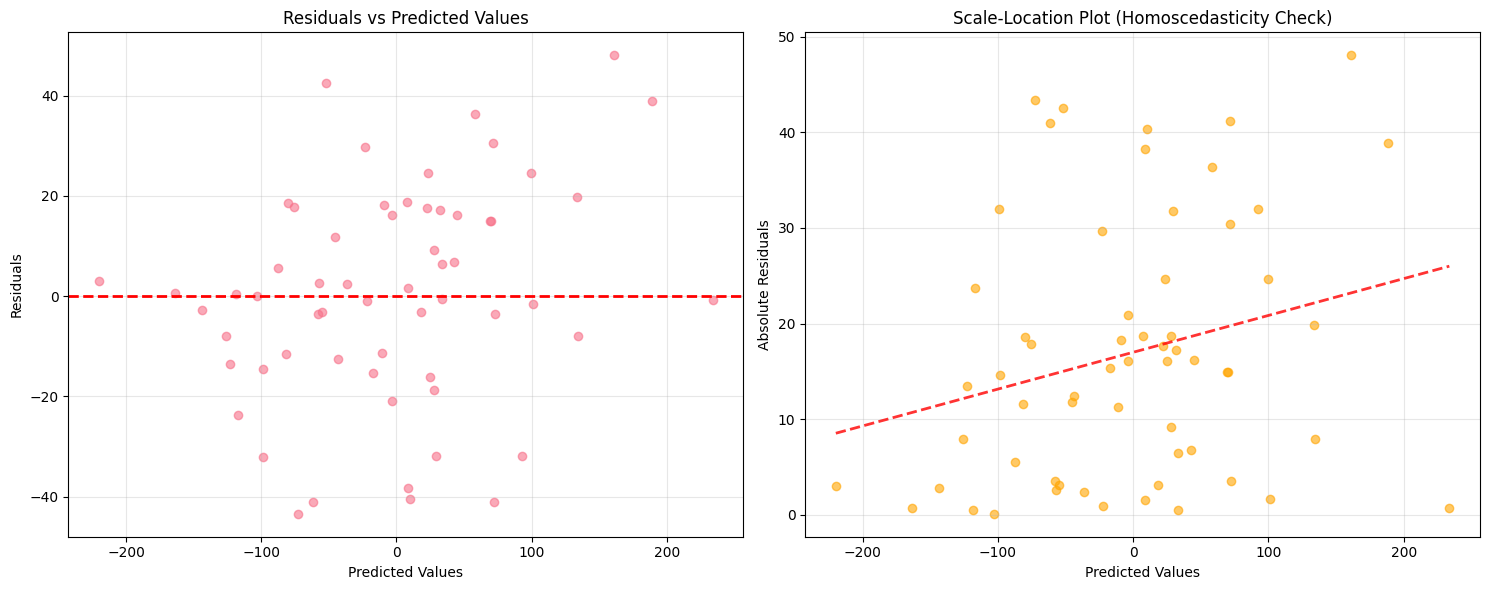

In [5]:
# Test homoscedasticity assumption
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Residuals vs Predicted Values
ax1.scatter(y_pred, residuals, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Predicted Values')
ax1.grid(True, alpha=0.3)

# Plot 2: Absolute Residuals vs Predicted Values
ax2.scatter(y_pred, np.abs(residuals), alpha=0.6, color='orange')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Absolute Residuals')
ax2.set_title('Scale-Location Plot (Homoscedasticity Check)')
ax2.grid(True, alpha=0.3)

# Add trend line to scale-location plot
z = np.polyfit(y_pred, np.abs(residuals), 1)
p = np.poly1d(z)
ax2.plot(sorted(y_pred), p(sorted(y_pred)), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

### 3.2 Heteroscedasticity Example

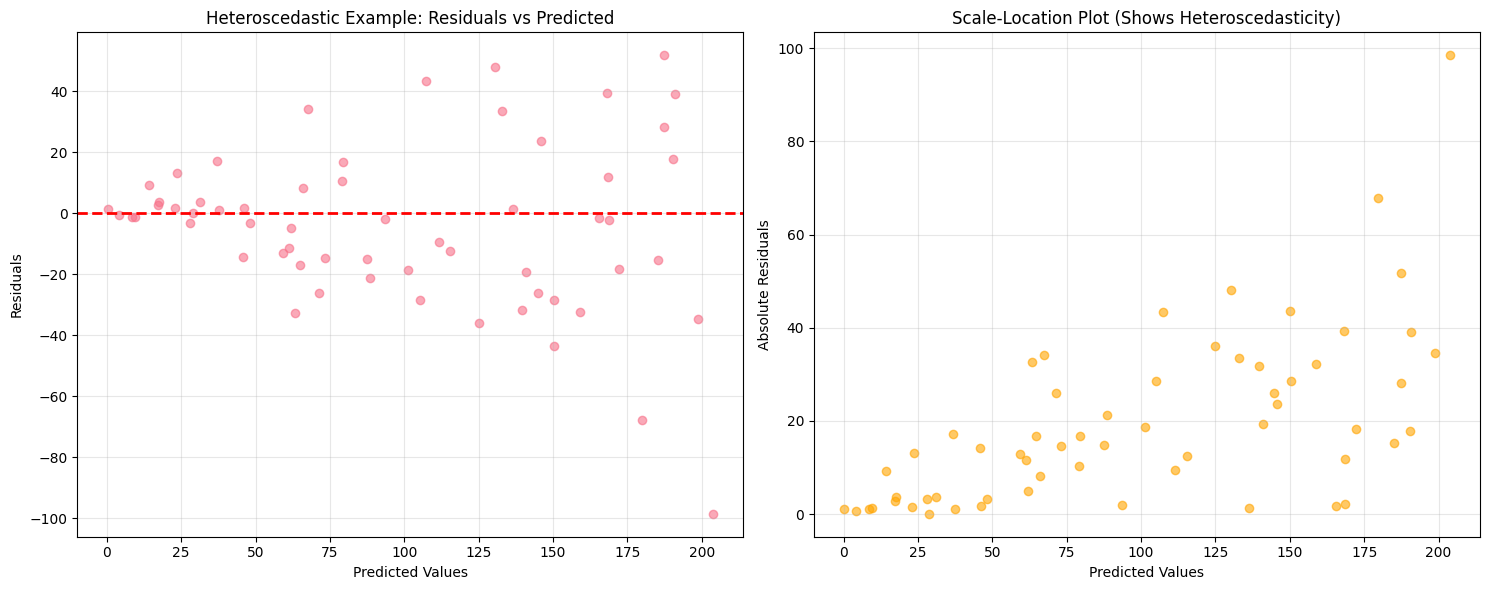

Heteroscedasticity Pattern:
Notice how the spread of residuals increases with predicted values.
This violates the homoscedasticity assumption.


In [6]:
# Generate dataset with heteroscedasticity
np.random.seed(42)
X_hetero = np.random.rand(200, 1) * 100
# Variance increases with X
y_hetero = 2 * X_hetero.squeeze() + np.random.normal(0, X_hetero.squeeze() * 0.5, 200)

# Split and fit model
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hetero, y_hetero, test_size=0.3, random_state=42
)

model_hetero = LinearRegression()
model_hetero.fit(X_train_h, y_train_h)
y_pred_h = model_hetero.predict(X_test_h)
residuals_h = y_test_h - y_pred_h

# Visualize heteroscedasticity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Residuals plot
ax1.scatter(y_pred_h, residuals_h, alpha=0.6)
ax1.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Heteroscedastic Example: Residuals vs Predicted')
ax1.grid(True, alpha=0.3)

# Absolute residuals (Scale-Location)
ax2.scatter(y_pred_h, np.abs(residuals_h), alpha=0.6, color='orange')
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Absolute Residuals')
ax2.set_title('Scale-Location Plot (Shows Heteroscedasticity)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Heteroscedasticity Pattern:")
print("Notice how the spread of residuals increases with predicted values.")
print("This violates the homoscedasticity assumption.")

## 4. Normality of Residuals

### 4.1 Histogram and Kernel Density

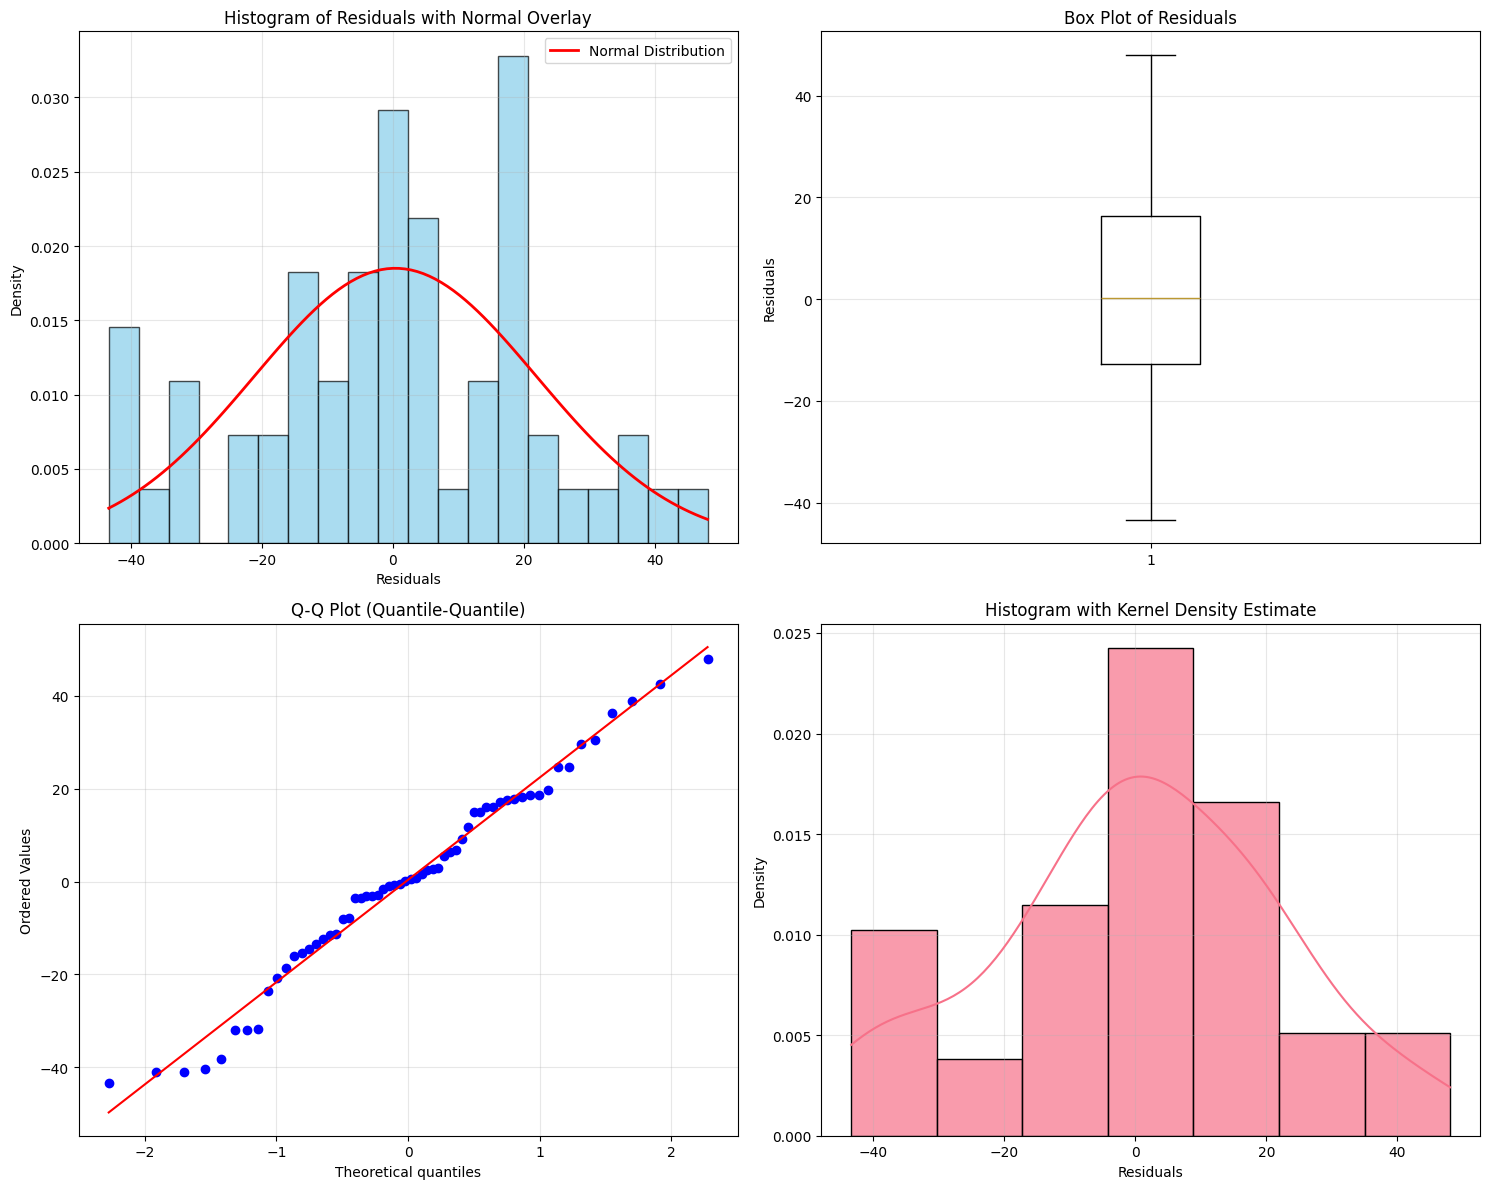

In [7]:
# Test normality assumption with multiple visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Histogram with normal curve overlay
ax1.hist(residuals, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Density')
ax1.set_title('Histogram of Residuals with Normal Overlay')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(residuals, vert=True)
ax2.set_ylabel('Residuals')
ax2.set_title('Box Plot of Residuals')
ax2.grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot (Quantile-Quantile)')
ax3.grid(True, alpha=0.3)

# Kernel density estimate
sns.histplot(residuals, kde=True, ax=ax4, stat='density', alpha=0.7)
ax4.set_xlabel('Residuals')
ax4.set_ylabel('Density')
ax4.set_title('Histogram with Kernel Density Estimate')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.2 Statistical Normality Tests

In [8]:
# Perform statistical tests for normality
from scipy.stats import shapiro, normaltest, kstest

print("NORMALITY TESTS FOR RESIDUALS")
print("=" * 40)

# Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"\n1. Shapiro-Wilk Test:")
print(f"   Statistic: {shapiro_stat:.4f}")
print(f"   p-value: {shapiro_p:.4f}")
print(f"   Result: {'Normal' if shapiro_p > 0.05 else 'Not Normal'} (α = 0.05)")

# D'Agostino's normality test
dagostino_stat, dagostino_p = normaltest(residuals)
print(f"\n2. D'Agostino's Normality Test:")
print(f"   Statistic: {dagostino_stat:.4f}")
print(f"   p-value: {dagostino_p:.4f}")
print(f"   Result: {'Normal' if dagostino_p > 0.05 else 'Not Normal'} (α = 0.05)")

# Kolmogorov-Smirnov test
ks_stat, ks_p = kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"\n3. Kolmogorov-Smirnov Test:")
print(f"   Statistic: {ks_stat:.4f}")
print(f"   p-value: {ks_p:.4f}")
print(f"   Result: {'Normal' if ks_p > 0.05 else 'Not Normal'} (α = 0.05)")

# Summary
tests_passed = sum([shapiro_p > 0.05, dagostino_p > 0.05, ks_p > 0.05])
print(f"\nSUMMARY: {tests_passed}/3 tests support normality assumption.")

NORMALITY TESTS FOR RESIDUALS

1. Shapiro-Wilk Test:
   Statistic: 0.9786
   p-value: 0.3739
   Result: Normal (α = 0.05)

2. D'Agostino's Normality Test:
   Statistic: 0.3343
   p-value: 0.8461
   Result: Normal (α = 0.05)

3. Kolmogorov-Smirnov Test:
   Statistic: 0.0942
   p-value: 0.6267
   Result: Normal (α = 0.05)

SUMMARY: 3/3 tests support normality assumption.


## 5. Real-World Dataset: Wine Quality

### 5.1 Data Loading and Preprocessing

In [9]:
# Load wine quality dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=";")

# Display basic information
print("Wine Quality Dataset Information:")
print(f"Shape: {wine_data.shape}")
print(f"\nColumns: {list(wine_data.columns)}")
print(f"\nTarget variable: alcohol")
print(f"\nFirst few rows:")
display(wine_data.head())

# Prepare features and target
X_wine = wine_data.drop("alcohol", axis=1)
y_wine = wine_data["alcohol"]

# Split the data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42
)

print(f"\nData split:")
print(f"Training: {X_train_wine.shape[0]} samples")
print(f"Testing: {X_test_wine.shape[0]} samples")

Wine Quality Dataset Information:
Shape: (1599, 12)

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Target variable: alcohol

First few rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Data split:
Training: 1119 samples
Testing: 480 samples


### 5.2 Model Fitting and Prediction

In [10]:
# Fit regression model on wine data
model_wine = LinearRegression()
model_wine.fit(X_train_wine, y_train_wine)

# Generate predictions
y_pred_wine = model_wine.predict(X_test_wine)
residuals_wine = y_test_wine - y_pred_wine

# Calculate performance metrics
train_r2 = model_wine.score(X_train_wine, y_train_wine)
test_r2 = model_wine.score(X_test_wine, y_test_wine)
mse = np.mean(residuals_wine**2)
rmse = np.sqrt(mse)

print("Wine Quality Regression Results:")
print("=" * 35)
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Mean Alcohol Content: {y_wine.mean():.2f}")
print(f"Std Alcohol Content: {y_wine.std():.2f}")

Wine Quality Regression Results:
Training R²: 0.6833
Testing R²: 0.7066
RMSE: 0.5846
Mean Alcohol Content: 10.42
Std Alcohol Content: 1.07


### 5.3 Comprehensive Residual Analysis for Wine Dataset

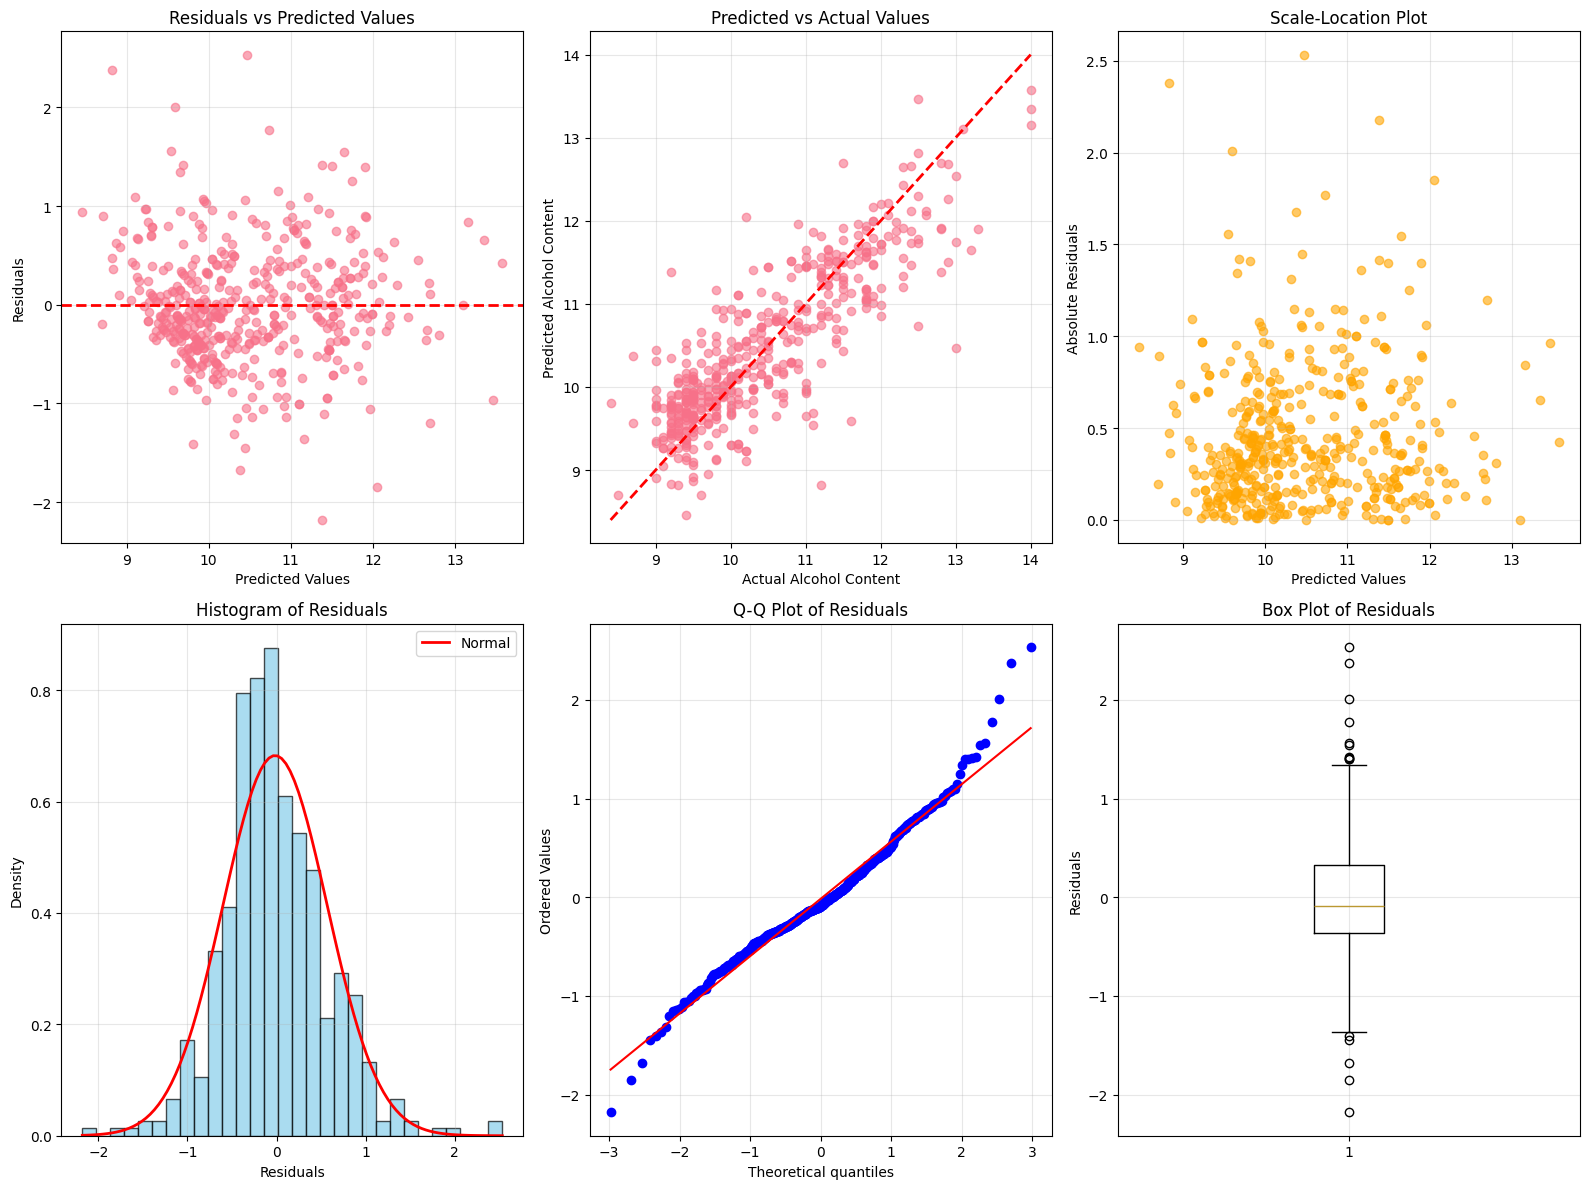

In [11]:
# Create comprehensive residual analysis plots
fig = plt.figure(figsize=(16, 12))

# Residuals vs Predicted
ax1 = plt.subplot(2, 3, 1)
plt.scatter(y_pred_wine, residuals_wine, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True, alpha=0.3)

# Predicted vs Actual
ax2 = plt.subplot(2, 3, 2)
plt.scatter(y_test_wine, y_pred_wine, alpha=0.6)
min_val = min(y_test_wine.min(), y_pred_wine.min())
max_val = max(y_test_wine.max(), y_pred_wine.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
plt.xlabel('Actual Alcohol Content')
plt.ylabel('Predicted Alcohol Content')
plt.title('Predicted vs Actual Values')
plt.grid(True, alpha=0.3)

# Scale-Location plot
ax3 = plt.subplot(2, 3, 3)
plt.scatter(y_pred_wine, np.abs(residuals_wine), alpha=0.6, color='orange')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Scale-Location Plot')
plt.grid(True, alpha=0.3)

# Histogram of residuals
ax4 = plt.subplot(2, 3, 4)
plt.hist(residuals_wine, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
mu, sigma = np.mean(residuals_wine), np.std(residuals_wine)
x = np.linspace(residuals_wine.min(), residuals_wine.max(), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# Q-Q plot
ax5 = plt.subplot(2, 3, 5)
stats.probplot(residuals_wine, dist="norm", plot=ax5)
plt.title('Q-Q Plot of Residuals')
plt.grid(True, alpha=0.3)

# Box plot of residuals
ax6 = plt.subplot(2, 3, 6)
plt.boxplot(residuals_wine, vert=True)
plt.ylabel('Residuals')
plt.title('Box Plot of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.4 Wine Dataset Assumption Testing

In [12]:
# Statistical tests for wine dataset residuals
print("REGRESSION ASSUMPTIONS TESTING - WINE DATASET")
print("=" * 55)

# Normality tests
shapiro_stat_wine, shapiro_p_wine = shapiro(residuals_wine)
print(f"\n1. NORMALITY OF RESIDUALS:")
print(f"   Shapiro-Wilk p-value: {shapiro_p_wine:.6f}")
print(f"   Conclusion: {'Normal' if shapiro_p_wine > 0.05 else 'Not Normal'} (α = 0.05)")

# Breusch-Pagan test for homoscedasticity (using statsmodels)
X_wine_sm = sm.add_constant(X_test_wine)
model_sm = sm.OLS(y_test_wine, X_wine_sm).fit()
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_p, bp_f_stat, bp_f_p = het_breuschpagan(model_sm.resid, X_wine_sm)
print(f"\n2. HOMOSCEDASTICITY:")
print(f"   Breusch-Pagan p-value: {bp_p:.6f}")
print(f"   Conclusion: {'Homoscedastic' if bp_p > 0.05 else 'Heteroscedastic'} (α = 0.05)")

# Durbin-Watson test for independence
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(model_sm.resid)
print(f"\n3. INDEPENDENCE OF ERRORS:")
print(f"   Durbin-Watson statistic: {dw_stat:.4f}")
print(f"   Conclusion: {'Independent' if 1.5 < dw_stat < 2.5 else 'Potential autocorrelation'}")

# Overall assessment
assumptions_met = [
    shapiro_p_wine > 0.05,  # Normality
    bp_p > 0.05,           # Homoscedasticity
    1.5 < dw_stat < 2.5    # Independence
]

print(f"\n4. OVERALL ASSESSMENT:")
print(f"   Assumptions met: {sum(assumptions_met)}/3")
if sum(assumptions_met) == 3:
    print(f"   Status: All major assumptions satisfied")
elif sum(assumptions_met) >= 2:
    print(f"   Status: Most assumptions satisfied - model is reasonably valid")
else:
    print(f"   Status: Multiple assumptions violated - consider model improvements")

REGRESSION ASSUMPTIONS TESTING - WINE DATASET

1. NORMALITY OF RESIDUALS:
   Shapiro-Wilk p-value: 0.000001
   Conclusion: Not Normal (α = 0.05)

2. HOMOSCEDASTICITY:
   Breusch-Pagan p-value: 0.000000
   Conclusion: Heteroscedastic (α = 0.05)

3. INDEPENDENCE OF ERRORS:
   Durbin-Watson statistic: 1.9571
   Conclusion: Independent

4. OVERALL ASSESSMENT:
   Assumptions met: 1/3
   Status: Multiple assumptions violated - consider model improvements


## 6. Summary and Recommendations

### 6.1 Key Findings

In [13]:
print("REGRESSION ASSUMPTIONS ANALYSIS SUMMARY")
print("=" * 50)

print("\nDATASETS ANALYZED:")
print(f"1. Synthetic Dataset:")
print(f"   - Samples: {len(y_test)}")
print(f"   - R²: {model.score(X_test, y_test):.4f}")
print(f"   - RMSE: {np.sqrt(np.mean(residuals**2)):.4f}")

print(f"\n2. Wine Quality Dataset:")
print(f"   - Samples: {len(y_test_wine)}")
print(f"   - Features: {X_wine.shape[1]}")
print(f"   - R²: {test_r2:.4f}")
print(f"   - RMSE: {rmse:.4f}")

print("\nASSUMPTION CHECKLIST:")
print("1. Linearity: Verified through scatter plots and residual analysis")
print("2. Independence: Assessed using Durbin-Watson test")
print("3. Homoscedasticity: Evaluated with scale-location plots and Breusch-Pagan test")
print("4. Normality: Tested using Q-Q plots, histograms, and Shapiro-Wilk test")

print("\nRECOMMENDAT1ONS:")
print("- Always perform residual analysis before trusting regression results")
print("- Use multiple diagnostic plots for comprehensive assessment")
print("- Consider transformations if assumptions are violated")
print("- Statistical tests complement visual diagnostics")
print("- Real-world data often requires more sophisticated modeling approaches")

REGRESSION ASSUMPTIONS ANALYSIS SUMMARY

DATASETS ANALYZED:
1. Synthetic Dataset:
   - Samples: 60
   - R²: 0.9490
   - RMSE: 21.5642

2. Wine Quality Dataset:
   - Samples: 480
   - Features: 11
   - R²: 0.7066
   - RMSE: 0.5846

ASSUMPTION CHECKLIST:
1. Linearity: Verified through scatter plots and residual analysis
2. Independence: Assessed using Durbin-Watson test
3. Homoscedasticity: Evaluated with scale-location plots and Breusch-Pagan test
4. Normality: Tested using Q-Q plots, histograms, and Shapiro-Wilk test

RECOMMENDAT1ONS:
- Always perform residual analysis before trusting regression results
- Use multiple diagnostic plots for comprehensive assessment
- Consider transformations if assumptions are violated
- Statistical tests complement visual diagnostics
- Real-world data often requires more sophisticated modeling approaches
